In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("datasets/hungary_chickenpox.csv")

In [7]:
raw_data

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


In [12]:
raw_data['date_fixed'] = pd.to_datetime(raw_data['Date'], format='%d/%m/%Y')

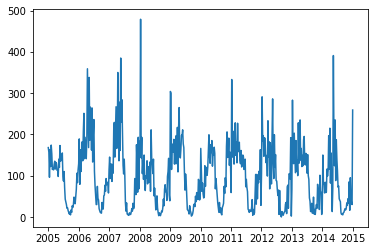

In [13]:
plt.plot(raw_data['date_fixed'], raw_data['BUDAPEST'])

In [15]:
x = raw_data['BUDAPEST'].values

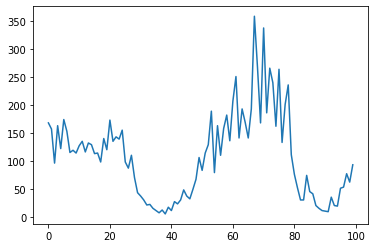

In [28]:
plt.plot(x[0:100])

In [51]:
#dada uma serie, ele retorna n valores e os w valores afrente
def window(x, n, w):
    window = []
    step_ahead = []
    i = 1
    while i + n + w <= len(x):
        window.append(x[i-1:i+n])
        step_ahead.append(x[i+n:i+n+w])
        i += 1
    return window, step_ahead

In [52]:
windows, step_ahead = window(x,10,2)

In [53]:
windows[0]

array([168, 157,  96, 163, 122, 174, 153, 115, 119, 114, 127], dtype=int64)

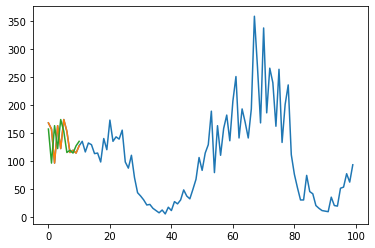

In [56]:
plt.plot(x[0:100])
plt.plot(windows[0])


In [58]:
np.array(windows)

array([[168, 157,  96, ..., 119, 114, 127],
       [157,  96, 163, ..., 114, 127, 135],
       [ 96, 163, 122, ..., 127, 135, 116],
       ...,
       [ 16,  20,  17, ...,  85,  16,  95],
       [ 20,  17,  21, ...,  16,  95,  43],
       [ 17,  21,  34, ...,  95,  43,  35]], dtype=int64)

In [67]:
#dada uma serie, ele retorna n valores e os w valores afrente
def window(x, n, w):
    window = []
    step_ahead = []
    i = 1
    while i + n + w <= len(x):
        window.append(x[i-1:i+n-1])
        step_ahead.append(x[i+n:i+n+w])
        i += 1
    return window, step_ahead

In [68]:
windows, step_ahead = window(x,10,2)

In [69]:
windows[0].shape

(10,)

In [71]:
x

array([168, 157,  96, 163, 122, 174, 153, 115, 119, 114, 127, 135, 116,
       132, 129, 113, 114,  98, 140, 120, 173, 135, 143, 139, 155,  98,
        87, 110,  70,  43,  37,  30,  21,  22,  15,  11,   7,  12,   5,
        17,  11,  27,  23,  30,  48,  37,  32,  49,  67, 106,  83, 114,
       129, 189,  79, 163, 110, 158, 182, 136, 207, 251, 141, 193, 169,
       141, 193, 359, 268, 168, 338, 186, 266, 240, 162, 264, 133, 201,
       236, 111,  76,  52,  30,  30,  74,  45,  41,  20,  15,  11,  10,
         9,  35,  20,  19,  51,  53,  77,  62,  93,  78,  82,  84,  58,
       114, 145,  93, 129, 114,  86, 127, 106, 211, 229, 145, 210, 267,
       166, 168, 350, 224, 136, 278, 161, 385, 230, 284, 210, 125, 104,
       140,  99,  35,  14,  34,   7,   7,   4,   4,  10,   6,   6,  12,
        20,  14,  33,  20,  25,  93,  72,  54, 175, 126,  60, 193,  68,
       183, 156, 479, 143, 193, 105, 136,  91, 150,  82,  64, 100,  95,
       136,  80, 122, 117,  84, 133,  62, 211, 143, 128, 105, 14

In [70]:
windows

[array([168, 157,  96, 163, 122, 174, 153, 115, 119, 114], dtype=int64),
 array([157,  96, 163, 122, 174, 153, 115, 119, 114, 127], dtype=int64),
 array([ 96, 163, 122, 174, 153, 115, 119, 114, 127, 135], dtype=int64),
 array([163, 122, 174, 153, 115, 119, 114, 127, 135, 116], dtype=int64),
 array([122, 174, 153, 115, 119, 114, 127, 135, 116, 132], dtype=int64),
 array([174, 153, 115, 119, 114, 127, 135, 116, 132, 129], dtype=int64),
 array([153, 115, 119, 114, 127, 135, 116, 132, 129, 113], dtype=int64),
 array([115, 119, 114, 127, 135, 116, 132, 129, 113, 114], dtype=int64),
 array([119, 114, 127, 135, 116, 132, 129, 113, 114,  98], dtype=int64),
 array([114, 127, 135, 116, 132, 129, 113, 114,  98, 140], dtype=int64),
 array([127, 135, 116, 132, 129, 113, 114,  98, 140, 120], dtype=int64),
 array([135, 116, 132, 129, 113, 114,  98, 140, 120, 173], dtype=int64),
 array([116, 132, 129, 113, 114,  98, 140, 120, 173, 135], dtype=int64),
 array([132, 129, 113, 114,  98, 140, 120, 173, 135

In [72]:
step_ahead


[array([135, 116], dtype=int64),
 array([116, 132], dtype=int64),
 array([132, 129], dtype=int64),
 array([129, 113], dtype=int64),
 array([113, 114], dtype=int64),
 array([114,  98], dtype=int64),
 array([ 98, 140], dtype=int64),
 array([140, 120], dtype=int64),
 array([120, 173], dtype=int64),
 array([173, 135], dtype=int64),
 array([135, 143], dtype=int64),
 array([143, 139], dtype=int64),
 array([139, 155], dtype=int64),
 array([155,  98], dtype=int64),
 array([98, 87], dtype=int64),
 array([ 87, 110], dtype=int64),
 array([110,  70], dtype=int64),
 array([70, 43], dtype=int64),
 array([43, 37], dtype=int64),
 array([37, 30], dtype=int64),
 array([30, 21], dtype=int64),
 array([21, 22], dtype=int64),
 array([22, 15], dtype=int64),
 array([15, 11], dtype=int64),
 array([11,  7], dtype=int64),
 array([ 7, 12], dtype=int64),
 array([12,  5], dtype=int64),
 array([ 5, 17], dtype=int64),
 array([17, 11], dtype=int64),
 array([11, 27], dtype=int64),
 array([27, 23], dtype=int64),
 array(